In [18]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Import raw dataset

In [3]:
df = pd.read_csv('diabetic_data.csv')
df_dtype_object = pd.read_csv('diabetic_data.csv',dtype='object')

## 1.1 Visualize Raw data 

In [4]:
pd.set_option('display.max_columns', 500)
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1          None   
1                 0     276  250.01    255                 9          None   
2                 1     648     250    V27                 6          None   
3                 0       8  250.43    403                 7          None   
4                 0     197     157    250                 5          None   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0      None        No          No          No             No          No   
1      None        No          No          No             No          No   
2      None        No          No          No             No          No   
3      None        No          No          No             No          No   
4      None        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                  No                  No                       No   
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4        

## 1.2 List of features, Datatypes and Descriptions

In [5]:
data_dictionary = pd.read_csv('Data_dictionary.csv')
pd.set_option('display.max_colwidth', -1)
data_dictionary
##If want to display all the description
#data_dictionary[['Feature name','Type']]

Feature name      Type  \
0   Encounter ID                 Numeric    
1   Patient number               Numeric    
2   Race                         Category   
3   Gender                       Category   
4   Age                          Category   
5   Weight                       Numeric    
6   Admission type               Category   
7   Discharge disposition        Category   
8   Admission source             Category   
9   Time in hospital             Numeric    
10  Payer code                   Category   
11  Medical specialty            Category   
12  Number of lab procedures     Numeric    
13  Number of procedures         Numeric    
14  Number of medications        Numeric    
15  Number of outpatient visits  Numeric    
16  Number of emergency visits   Numeric    
17  Number of inpatient visits   Numeric    
18  Diagnosis 1                  Category   
19  Diagnosis 2                  Category   
20  Diagnosis 3                  Category   
21  Number of diagnoses          Numeric    
22  Glucose serum test result    Category   
23  A1c test result              Category   
24  Change of medications        Category   
25  Diabetes medications         Category   
26  24 features for medications  Category   
27  Readmitted                   Category   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Description  \
0   Unique identifier of an encounter                                                                                                                                                                                                                                                                                                                                                                                                                                              
1   Unique identifier of a patient                                                                                                                                                                                                                                                                                                                                                                                                                                                 
2   Races of patient                                                                                                                                                                                                                                                                                                                                                                                                                                                               
3   Gender of patient                                                                                                                                                                                                                                                                                                                                                                                                                                                              
4   Grouped in 10-year intervals. Upper number exclusive                                                                                                                                                                                                                                                                                                                             

## 1.3 Preliminary Analysis

### 1.4.1 Shape of the dataset

In [9]:
print ('Number of Observations: ', df.shape[0])
print ('Number of Features: ', df.shape[1])

Number of Observations:  101766
Number of Features:  50


### 1.4.2 Determine Features' Data Type

In [10]:
df_feature = pd.DataFrame(df.dtypes, columns = ['Data Types'])

### 1.4.3 Determine Missing Data point

Looking at the raw dataset, we can see that missing values are represented by "?", we want to determine the percentage of the missing observaction for each feature. That way we can see which features should be drop for this analysis. 

In [11]:
features = df.columns
df_feature['% observations presented'] = df[df_dtype_object[features] != '?'].count()/101766*100
df_feature

Data Types  % observations presented
encounter_id              int64      100.000000              
patient_nbr               int64      100.000000              
race                      object     97.766445               
gender                    object     100.000000              
age                       object     100.000000              
weight                    object     3.141521                
admission_type_id         int64      100.000000              
discharge_disposition_id  int64      100.000000              
admission_source_id       int64      100.000000              
time_in_hospital          int64      100.000000              
payer_code                object     60.442584               
medical_specialty         object     50.917792               
num_lab_procedures        int64      100.000000              
num_procedures            int64      100.000000              
num_medications           int64      100.000000              
number_outpatient         int64      100.000000              
number_emergency          int64      100.000000              
number_inpatient          int64      100.000000              
diag_1                    object     99.979364               
diag_2                    object     99.648213               
diag_3                    object     98.601694               
number_diagnoses          int64      100.000000              
max_glu_serum             object     100.000000              
A1Cresult                 object     100.000000              
metformin                 object     100.000000              
repaglinide               object     100.000000              
nateglinide               object     100.000000              
chlorpropamide            object     100.000000              
glimepiride               object     100.000000              
acetohexamide             object     100.000000              
glipizide                 object     100.000000              
glyburide                 object     100.000000              
tolbutamide               object     100.000000              
pioglitazone              object     100.000000              
rosiglitazone             object     100.000000              
acarbose                  object     100.000000              
miglitol                  object     100.000000              
troglitazone              object     100.000000              
tolazamide                object     100.000000              
examide                   object     100.000000              
citoglipton               object     100.000000              
insulin                   object     100.000000              
glyburide-metformin       object     100.000000              
glipizide-metformin       object     100.000000              
glimepiride-pioglitazone  object     100.000000              
metformin-rosiglitazone   object     100.000000              
metformin-pioglitazone    object     100.000000              
change                    object     100.000000              
diabetesMed               object     100.000000              
readmitted                object     100.000000

# 2. Parsing and Cleaning

## 2.1 Parsing Features

As we can see, **"weight", "payer_code" and "medical_specialty"** is missing alot of the data. It will not be ideal to use these feature. 

**"encounter_id" and "patient_nbr"** are also not an potential predictors.

Also removing all the **24 features for medications, glucose serum test result and A1c test result**, Which we will not study for this project

In [12]:
df_parse = df[[i for i in df.columns if i not in ('weight','payer_code','medical_specialty','encounter_id','patient_nbr')]]
med_24 = df_parse.loc[:,'max_glu_serum':'metformin-pioglitazone'].columns
df_parse = df_parse.drop(med_24, axis=1)
df_parse.head()

race  gender      age  admission_type_id  \
0  Caucasian        Female  [0-10)   6                   
1  Caucasian        Female  [10-20)  1                   
2  AfricanAmerican  Female  [20-30)  1                   
3  Caucasian        Male    [30-40)  1                   
4  Caucasian        Male    [40-50)  1                   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0  25                        1                    1                  
1  1                         7                    3                  
2  1                         7                    2                  
3  1                         7                    2                  
4  1                         7                    1                  

   num_lab_procedures  num_procedures  num_medications  number_outpatient  \
0  41                  0               1                0                   
1  59                  0               18               0                   
2  11                  5               13               2                   
3  44                  1               16               0                   
4  51                  0               8                0                   

   number_emergency  number_inpatient  diag_1  diag_2 diag_3  \
0  0                 0                 250.83  ?       ?       
1  0                 0                 276     250.01  255     
2  0                 1                 648     250     V27     
3  0                 0                 8       250.43  403     
4  0                 0                 197     157     250     

   number_diagnoses change diabetesMed readmitted  
0  1                 No     No          NO         
1  9                 Ch     Yes         >30        
2  6                 No     Yes         NO         
3  7                 Ch     Yes         NO         
4  5                 Ch     Yes         NO

## 2.2 Removing rows contain missing value

Currently Race and Diag have missing value. However it is ok to only have one diagnosis code. Therefore, we only eliminating row if "race" and "diag_1" is equal to "?"

In [14]:
df_clean = df_parse[df_parse.race != '?']
df_clean = df_clean[df_clean.diag_1 != '?']
df_clean.count()

race                        99474
gender                      99474
age                         99474
admission_type_id           99474
discharge_disposition_id    99474
admission_source_id         99474
time_in_hospital            99474
num_lab_procedures          99474
num_procedures              99474
num_medications             99474
number_outpatient           99474
number_emergency            99474
number_inpatient            99474
diag_1                      99474
diag_2                      99474
diag_3                      99474
number_diagnoses            99474
change                      99474
diabetesMed                 99474
readmitted                  99474
dtype: int64

## 2.3 Redefining Features

### Re-mapped Catogory Variables


In [15]:
df_redefine = df_clean.copy()
#outcome
df_redefine.readmitted.replace(['NO','<30','>30'],[0,1,2],inplace=True)
#gender
df_redefine.gender.replace(['Male','Female','Unknown/Invalid'],[0,1,2],inplace=True)
#race
df_redefine.race.replace(['AfricanAmerican','Asian','Caucasian','Hispanic','Other'],[0,1,2,3,4],inplace=True)
#age
df_redefine.age.replace(
    ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],
    [5,15,25,35,45,55,65,75,85,95],
    inplace=True)
#Change of medications
df_redefine.change.replace(['No','Ch'],[0,1],inplace=True)
#Diabetes medications
df_redefine.diabetesMed.replace(['No','Yes'],[0,1],inplace=True)
df_redefine

race  gender  age  admission_type_id  discharge_disposition_id  \
0       2     1       5    6                  25                         
1       2     1       15   1                  1                          
2       0     1       25   1                  1                          
3       2     0       35   1                  1                          
4       2     0       45   1                  1                          
5       2     0       55   2                  1                          
6       2     0       65   3                  1                          
7       2     0       75   1                  1                          
8       2     1       85   2                  1                          
9       2     1       95   3                  3                          
10      0     1       45   1                  1                          
11      0     0       65   2                  1                          
12      2     1       45   1                  3                          
13      2     0       85   1                  6                          
14      0     1       65   3                  1                          
15      0     0       65   1                  3                          
16      0     0       55   1                  1                          
17      2     1       55   1                  1                          
18      0     0       75   1                  1                          
22      0     1       75   2                  1                          
23      2     1       85   2                  6                          
24      0     1       75   3                  1                          
25      4     1       55   1                  1                          
26      2     0       85   1                  3                          
27      2     1       55   1                  1                          
28      2     0       25   2                  1                          
29      2     1       85   1                  2                          
30      0     1       65   1                  1                          
31      0     0       75   1                  5                          
32      2     1       75   1                  1                          
...    ..    ..       ..  ..                 ..                          
101736  2     1       65   1                  3                          
101737  2     1       45   3                  1                          
101738  2     0       75   1                  1                          
101739  0     0       75   1                  1                          
101740  2     0       45   3                  1                          
101741  0     0       95   1                  3                          
101742  2     0       75   2                  6                          
101743  2     0       85   1                  13                         
101744  2     1       85   1                  1                          
101745  2     0       55   2                  1                          
101746  2     0       75   1                  1                          
101747  2     1       75   1                  22                         
101748  2     1       45   1                  4                          
101749  2     1       75   3                  6                          
101750  2     1       85   3                  1                          
101751  2     0       75   3                  6                          
101752  4     1       45   3                  1                          
101753  4     0       45   1                  1                          
101754  2     1       75   1                  1                          
101755  4     1       45   1                  1                          
101756  4     1       65   1                  1                          
101757  2     1       75   1                  1                          
101758  2   

### Recategorized Diagnosis Code

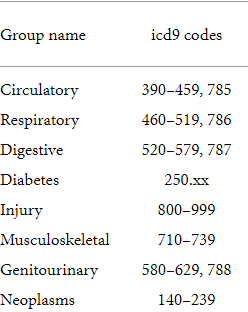

# 3. Relationship: Independent variables and Dependent variable

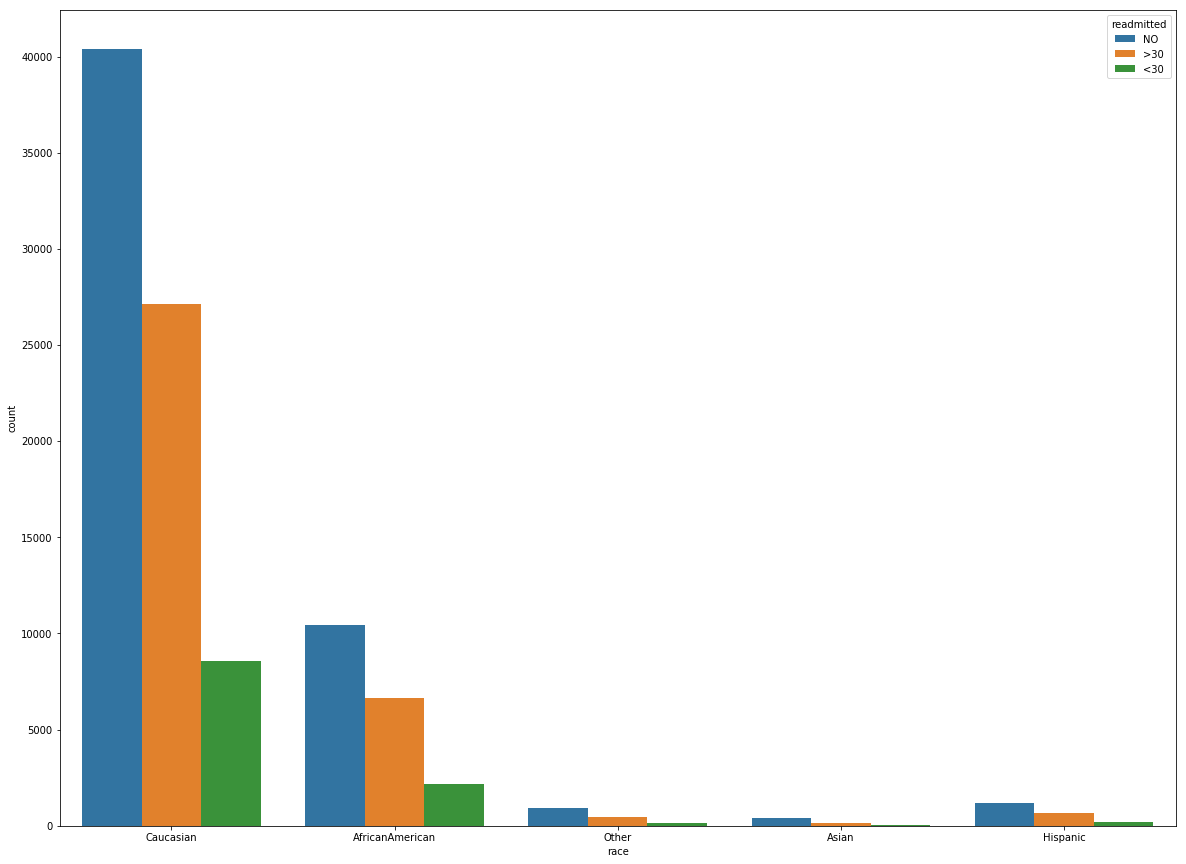

In [26]:
plt.subplots(figsize=(20,15))
ax = sns.countplot(x="race", hue = "readmitted", data=df_clean)

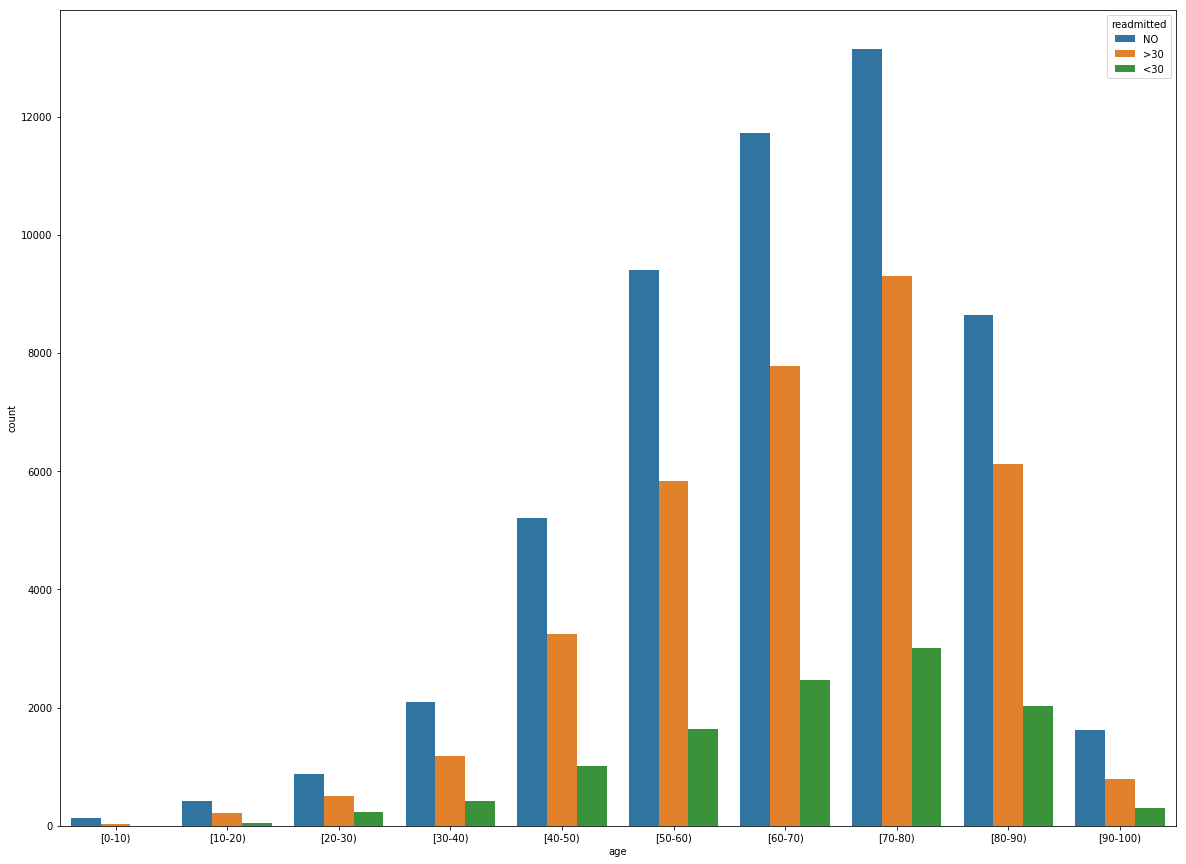

In [25]:
plt.subplots(figsize=(20,15))
ax = sns.countplot(x="age", hue = "readmitted", data=df_clean)

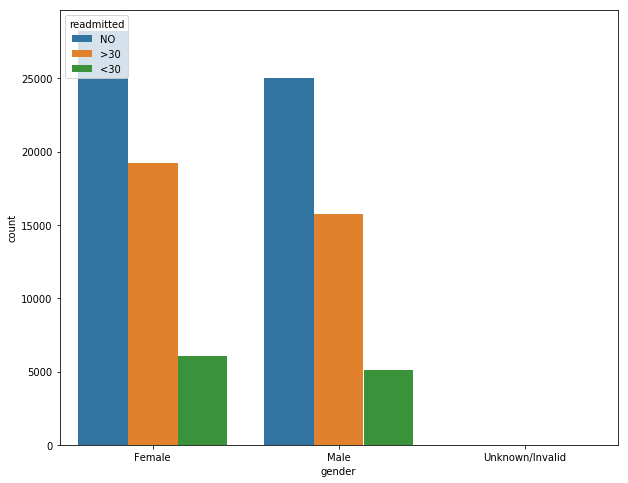

In [28]:
plt.subplots(figsize=(10,8))
ax = sns.countplot(x="gender", hue = "readmitted", data=df_clean)